In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, t

In [2]:
stock_symbol = "AAPL"
data = yf.download(stock_symbol, start="2020-01-01", end="2023-12-31")

[*********************100%***********************]  1 of 1 completed


In [3]:
data['Daily Returns'] = data['Adj Close'].pct_change()
daily_volume = data['Volume']
daily_close = data['Adj Close']
daily_returns = data['Daily Returns'].dropna()

In [4]:
mean_returns = daily_returns.mean()
std_returns = daily_returns.std()
n = len(daily_returns)

In [5]:
z_scores = (daily_returns - mean_returns) / std_returns
t_scores = z_scores * np.sqrt(n - 1)

In [6]:
conf_interval = t.interval(0.95, df=n-1, loc=mean_returns, scale=std_returns/np.sqrt(n))


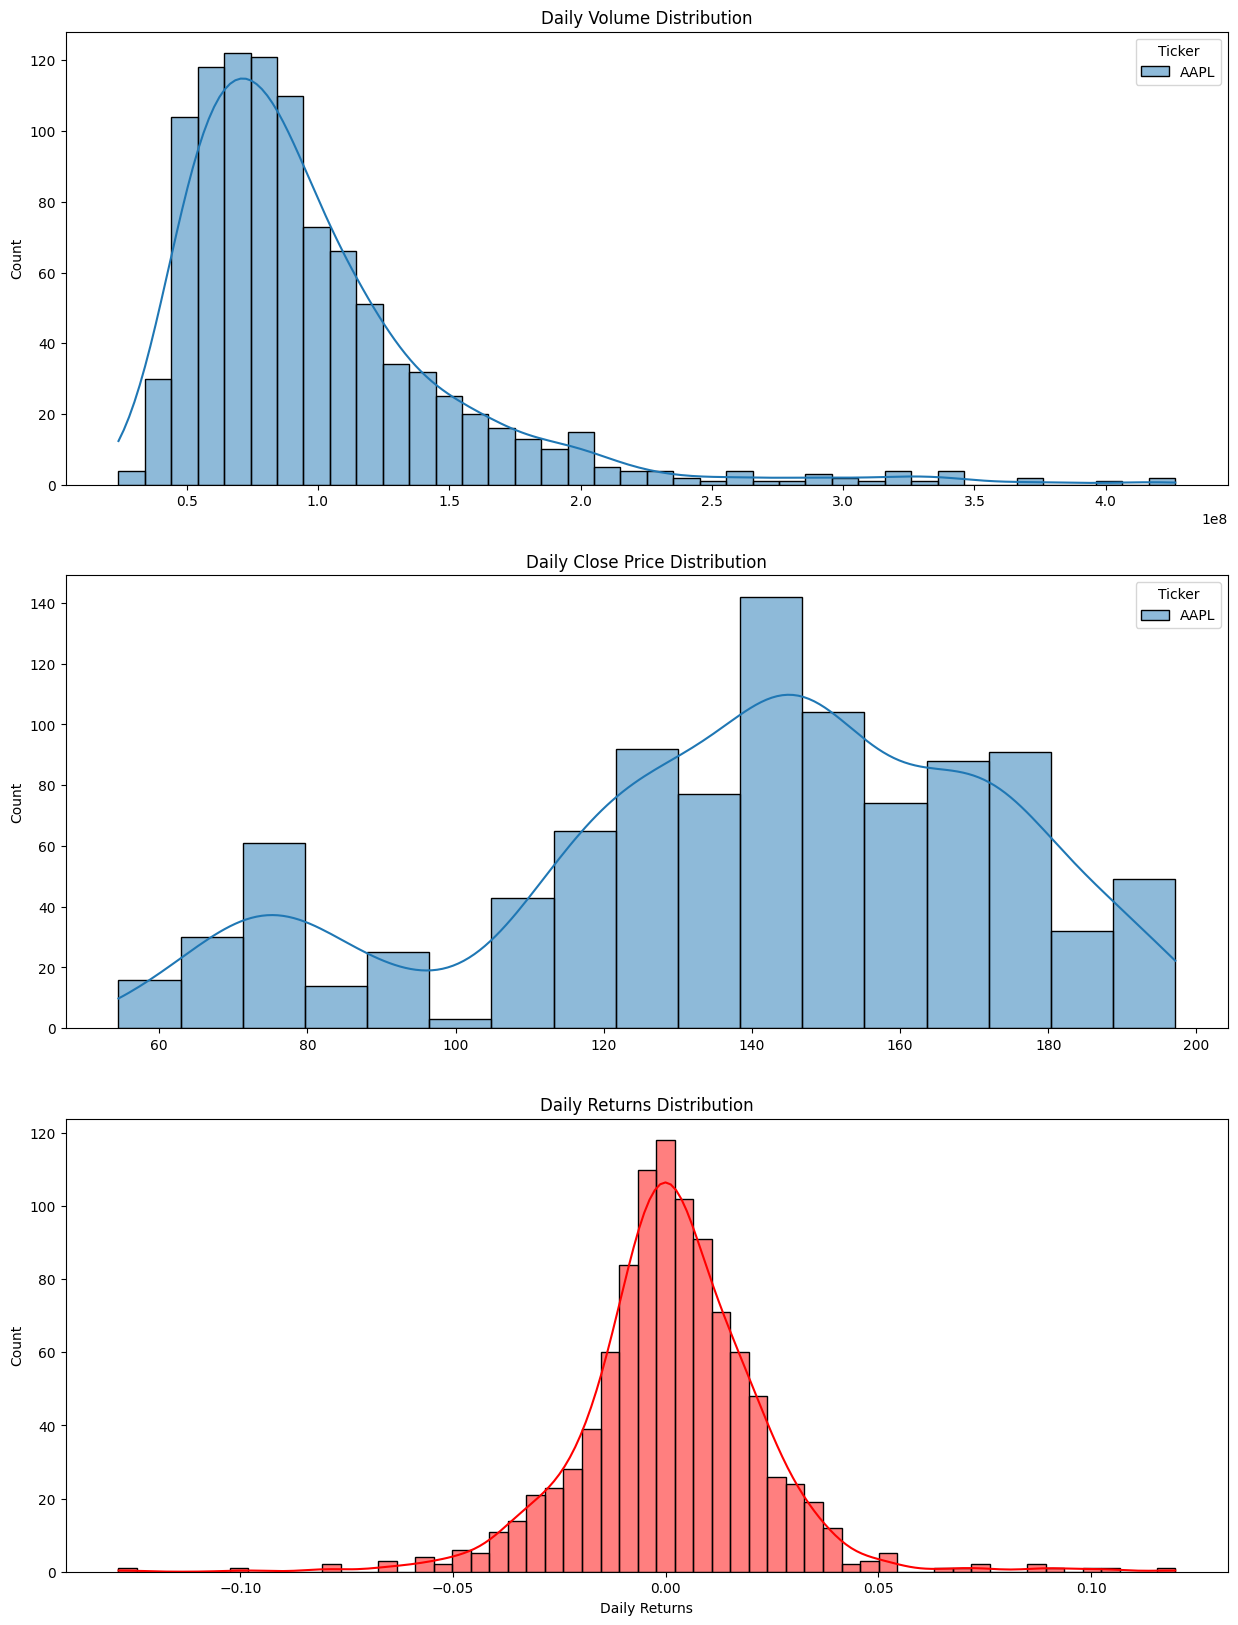

In [9]:
plt.figure(figsize=(15, 20))

# daily volume distribution
plt.subplot(3, 1, 1)
sns.histplot(daily_volume, kde=True, color='blue')
plt.title('Daily Volume Distribution')

# daily close price distribution
plt.subplot(3, 1, 2)
sns.histplot(daily_close, kde=True, color='green')
plt.title('Daily Close Price Distribution')

# daily returns distribution
plt.subplot(3, 1, 3)
sns.histplot(daily_returns, kde=True, color='red')
plt.title('Daily Returns Distribution')

plt.show()

In [8]:
print(f"Mean Daily Returns: {mean_returns:.5f}")
print(f"Standard Deviation of Returns: {std_returns:.5f}")
print(f"95% Confidence Interval for Daily Returns: {conf_interval}")

Mean Daily Returns: 0.00119
Standard Deviation of Returns: 0.02115
95% Confidence Interval for Daily Returns: (-0.00012236026326776367, 0.0024954944624724267)
